# Introdução à Ciência de Dados - UFPB

Professor: Yuri Malheiros
    
Aluno: Lucas Miranda de Aguiar

## Elo Ranking

In [1]:
import math
import pandas as pd
import numpy as np

def logit(x, c=0.4):
    return 1/(1+math.exp(-c*x)).astype(float)

In [2]:
def prob(a, b):
    return logit(a-b)

In [3]:
def mi(a, b):
    return 1*prob(a,b) + ((-1)*(1-prob(a,b)))

In [4]:
def update_ranking(a, b, result, k):
    return a + k*(result-mi(a,b))

In [13]:
movies_df = pd.read_csv("movies.csv")
movies_df

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,31-Oct-08,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,2-Mar-07,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,11-Aug-06,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,28-Oct-05,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


Para termos uma classificação de qualidade melhor com os dados que temos, iremos unir as colunas do Rotten Tomatoes Rating(a ecala é de 0-100, então na função ela vai ser dividida por 10) e IMDB Rating, realizar a soma das duas e divide por dois.
Porém, talvez ainda assim não é justo, pois alguns filmes tem um alto custo de produção e o que se espera de um filme com maior investimento, são maiores retornos, tanto financeiros como de público.

Com base nisso, iremos analisar os valores da coluna "Production Budget", temos que todos os custos proximo à casa de 10 milhões, 10e7. Então dividindo os valores desta coluna por 10e7, teremos valores entre 0 e 1.

Portanto, nossa função fica assim: 

movies_rating["Median_Rating"] = (((movies_rating["Rotten Tomatoes Rating"]/10) +  movies_rating["IMDB Rating"])/2) - (movies_rating["Production Budget"]/10e7)

Teremos o custo de produção em casas decimais que vai ser subtraido da media geral, tornando a avaliação mais justa com base no dinheiro investido.

In [22]:

movies_rating = movies_df
movies_rating = movies_rating.groupby("Title").mean()
movies_rating["Score"] = (((movies_rating["Rotten Tomatoes Rating"]/10) +  movies_rating["IMDB Rating"])/2) 
movies_rating["Lucrative"] = movies_rating["Worldwide Gross"] - movies_rating["Production Budget"]
movies_r = movies_rating.sort_values(by="Score", ascending = False)[[ "Rotten Tomatoes Rating","Production Budget",  "IMDB Rating",
                                                                             "Score"]]

movies_r.iloc[:20]



,Rotten Tomatoes Rating,Production Budget,IMDB Rating,Score
Title,,,,
The Godfather,100.0,7000000.0,9.2,9.60
Toy Story 3,99.0,200000000.0,8.9,9.40
Schindler's List,97.0,25000000.0,8.9,9.30
One Flew Over the Cuckoo's Nest,96.0,4400000.0,8.9,9.25
Goodfellas,97.0,25000000.0,8.8,9.25
Modern Times,100.0,1500000.0,8.5,9.25
Casablanca,97.0,950000.0,8.8,9.25
Apocalypse Now,98.0,31500000.0,8.6,9.20
Singin' in the Rain,100.0,2540000.0,8.4,9.20


<AxesSubplot:xlabel='Title'>

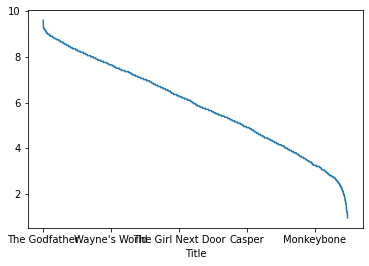